In [250]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [251]:
data = pd.read_excel("Données TD3.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data

date = data['Date']

Z = exp(−rT)(ST − K)+

In [252]:
def black_scholes_call(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

def calculate_delta(S, K, r, T, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    else:
        delta = -norm.cdf(-d1)
    return delta

def calculate_gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma
def calculate_vega(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S0 * np.sqrt(T) * norm.pdf(d1)

1/ A partir des données fournies (historique d’une action, colonne B), créez l’historique du portefeuille 
de réplication d’un call européen de maturité le 31/12/2018, de strike 6 et de volatilité constante égale 
à 20%. Ce portefeuille de réplication a-t-il toujours la valeur de l’option ? Pourquoi ?

In [295]:
call_price_BS = []
delta_call = []
gamma_call = []


for i in range(len(data['Date'])):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    call_price_BS.append(black_scholes_call(data['Prix action'][i],6,0,maturity,0.3414376914717737))
    delta_call.append(calculate_delta(data['Prix action'][i],6,0,maturity,0.3414376914717737))
    gamma_call.append(calculate_gamma(data['Prix action'][i],6,0,maturity,0.3414376914717737))
    
data['delta_call'] = delta_call
data['call_price_BS'] = call_price_BS
data['gamma_call'] = gamma_call

data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,Vol I6 Newton,Vol I6 Dichotomy,"Vol I6,5 Newton","Vol I6,5 Dichotomy",Daily_Return
0,2017-10-02,6.7420,NaN,NaN,0.690216,1.378184,0.137224,1.374368,0.717437,0.608477,0.255134,0.539992,0.361817,1.374368,0.000000,0.999999,0.000000,0.999999,NaN
1,2017-10-03,6.9550,NaN,NaN,0.718460,1.527254,0.127440,1.521421,0.852063,0.660876,0.235955,0.542124,0.360466,1.524132,0.000000,0.999999,0.000000,0.999999,0.031593
2,2017-10-04,6.9100,1.02096,0.59093,0.712746,1.494065,0.129650,1.489077,0.821935,0.650227,0.240523,0.541080,0.361183,1.491578,0.145860,0.145860,0.116967,0.116968,-0.006470
3,2017-10-05,7.0060,1.09932,0.65885,0.725060,1.562097,0.125334,1.557526,0.884829,0.672962,0.231411,0.543597,0.359549,1.560282,0.144789,0.144788,0.116565,0.116566,0.013893
4,2017-10-06,7.0000,1.09306,0.65440,0.724387,1.556766,0.125732,1.553174,0.880172,0.671660,0.232239,0.543380,0.359727,1.555593,0.144311,0.144310,0.116687,0.116687,-0.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2018-09-28,5.8440,0.28498,0.19737,0.473927,0.335555,0.393135,0.617081,0.047469,0.159275,0.408992,0.965230,0.319789,0.649752,0.298548,0.298548,0.362253,0.362253,-0.030524
254,2018-10-01,5.7240,0.24261,0.16974,0.424271,0.275269,0.401425,0.560258,0.029332,0.110635,0.330316,1.220058,0.288691,0.593872,0.312172,0.312172,0.376124,0.376124,-0.020534
255,2018-10-02,5.6900,0.24491,0.17452,0.409777,0.258998,0.402913,0.545853,0.025212,0.098443,0.307024,1.317359,0.279439,0.579029,0.328587,0.328587,0.393196,0.393196,-0.005940
256,2018-10-03,5.7260,0.27191,0.19592,0.423505,0.271893,0.405616,0.560581,0.028367,0.108528,0.329310,1.236557,0.288706,0.593245,0.341453,0.341454,0.406829,0.406830,0.006327


V0 + delta*(V1-V0)

In [296]:
portflio_values = []

portflio_values.append(call_price_BS[0])
for i in range(1,len(data)):
    portflio_values.append(portflio_values[i-1] + data['delta_call'][i-1]*((data['Prix action'][i])-data['Prix action'][i-1]))

data['portfolio_values'] = portflio_values
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,Vol I6 Newton,Vol I6 Dichotomy,"Vol I6,5 Newton","Vol I6,5 Dichotomy",Daily_Return
0,2017-10-02,6.7420,NaN,NaN,0.690216,1.378184,0.137224,1.378184,0.717437,0.608477,0.255134,0.539992,0.361817,1.374368,0.000000,0.999999,0.000000,0.999999,NaN
1,2017-10-03,6.9550,NaN,NaN,0.718460,1.527254,0.127440,1.525200,0.852063,0.660876,0.235955,0.542124,0.360466,1.524132,0.000000,0.999999,0.000000,0.999999,0.031593
2,2017-10-04,6.9100,1.02096,0.59093,0.712746,1.494065,0.129650,1.492870,0.821935,0.650227,0.240523,0.541080,0.361183,1.491578,0.145860,0.145860,0.116967,0.116968,-0.006470
3,2017-10-05,7.0060,1.09932,0.65885,0.725060,1.562097,0.125334,1.561293,0.884829,0.672962,0.231411,0.543597,0.359549,1.560282,0.144789,0.144788,0.116565,0.116566,0.013893
4,2017-10-06,7.0000,1.09306,0.65440,0.724387,1.556766,0.125732,1.556943,0.880172,0.671660,0.232239,0.543380,0.359727,1.555593,0.144311,0.144310,0.116687,0.116687,-0.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2018-09-28,5.8440,0.28498,0.19737,0.473927,0.335555,0.393135,0.621750,0.047469,0.159275,0.408992,0.965230,0.319789,0.649752,0.298548,0.298548,0.362253,0.362253,-0.030524
254,2018-10-01,5.7240,0.24261,0.16974,0.424271,0.275269,0.401425,0.564879,0.029332,0.110635,0.330316,1.220058,0.288691,0.593872,0.312172,0.312172,0.376124,0.376124,-0.020534
255,2018-10-02,5.6900,0.24491,0.17452,0.409777,0.258998,0.402913,0.550453,0.025212,0.098443,0.307024,1.317359,0.279439,0.579029,0.328587,0.328587,0.393196,0.393196,-0.005940
256,2018-10-03,5.7260,0.27191,0.19592,0.423505,0.271893,0.405616,0.565205,0.028367,0.108528,0.329310,1.236557,0.288706,0.593245,0.341453,0.341454,0.406829,0.406830,0.006327


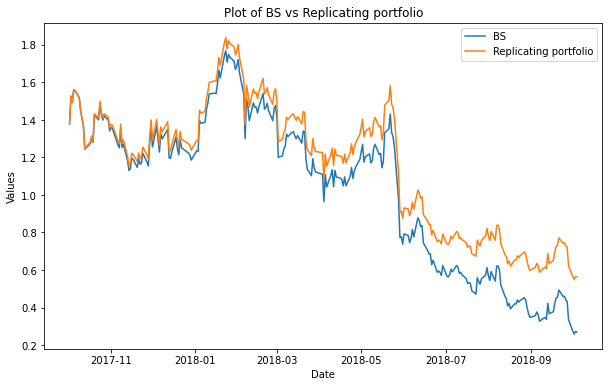

In [297]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].values, data['call_price_BS'].values, label='BS')
plt.plot(data['Date'].values, data['portfolio_values'].values, label='Replicating portfolio')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of BS vs Replicating portfolio')
plt.legend()

# Show the plot
plt.show()

-0.12202601787414653


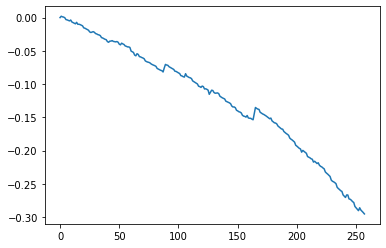

In [298]:
spread_bs_port = data['call_price_BS'].values -data['portfolio_values'].values
plt.plot(spread_bs_port)
print(spread_bs_port.mean())

2/ On suppose qu’on dispose en plus d’une autre option de mêmes caractéristiques (en particulier une 
volatilité de 20%), sinon le strike qui vaut 6.5. On se propose de répliquer notre option initiale en delta 
et en gamma. Comment procéder ? Ce nouveau portefeuille de réplication a-t-il toujours la valeur de 
l’option ?

In [306]:
call_price_BS_2 = []
delta_call_2 = []
gamma_call_2 = []


for i in range(len(data['Date'])):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    call_price_BS_2.append(black_scholes_call(data['Prix action'][i],6.5,0,maturity,0.40679126372783786))
    delta_call_2.append(calculate_delta(data['Prix action'][i],6.5,0,maturity,0.40679126372783786))
    gamma_call_2.append(calculate_gamma(data['Prix action'][i],6.5,0,maturity,0.40679126372783786))
    

data['call_price_BS_2'] = call_price_BS_2
data['delta_call_2'] = delta_call_2
data['gamma_call_2'] = gamma_call_2

data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,Vol I6 Newton,Vol I6 Dichotomy,"Vol I6,5 Newton","Vol I6,5 Dichotomy",Daily_Return
0,2017-10-02,6.7420,NaN,NaN,0.690216,1.378184,0.137224,1.378184,1.314230,0.620797,0.124265,0.537849,0.362948,1.378184,0.000000,0.999999,0.000000,0.999999,NaN
1,2017-10-03,6.9550,NaN,NaN,0.718460,1.527254,0.127440,1.525200,1.447937,0.646532,0.117805,0.540103,0.361519,1.527901,0.000000,0.999999,0.000000,0.999999,0.031593
2,2017-10-04,6.9100,1.02096,0.59093,0.712746,1.494065,0.129650,1.492870,1.417672,0.641161,0.119336,0.539035,0.362251,1.495360,0.145860,0.145860,0.116967,0.116968,-0.006470
3,2017-10-05,7.0060,1.09932,0.65885,0.725060,1.562097,0.125334,1.561293,1.478474,0.652450,0.116490,0.541607,0.360579,1.564038,0.144789,0.144788,0.116565,0.116566,0.013893
4,2017-10-06,7.0000,1.09306,0.65440,0.724387,1.556766,0.125732,1.556943,1.473264,0.651725,0.116808,0.541388,0.360758,1.559353,0.144311,0.144310,0.116687,0.116687,-0.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2018-09-28,5.8440,0.28498,0.19737,0.473927,0.335555,0.393135,0.621750,0.245020,0.340123,0.303759,0.961230,0.320827,0.654312,0.298548,0.298548,0.362253,0.362253,-0.030524
254,2018-10-01,5.7240,0.24261,0.16974,0.424271,0.275269,0.401425,0.564879,0.199745,0.300014,0.299061,1.215277,0.289818,0.598380,0.312172,0.312172,0.376124,0.376124,-0.020534
255,2018-10-02,5.6900,0.24491,0.17452,0.409777,0.258998,0.402913,0.550453,0.187540,0.288463,0.297077,1.312317,0.280589,0.583518,0.328587,0.328587,0.393196,0.393196,-0.005940
256,2018-10-03,5.7260,0.27191,0.19592,0.423505,0.271893,0.405616,0.565205,0.195883,0.297801,0.301281,1.231714,0.289830,0.597760,0.341453,0.341454,0.406829,0.406830,0.006327


In [307]:
nc = []
for i in range(len(data)):
    nc.append(data['gamma_call'][i]/data['gamma_call_2'][i])
data['nc'] = nc

In [308]:
ns = []
for i in range(len(data)):
    ns.append(data['delta_call'][i] - data['delta_call_2'][i]*data['nc'][i])
data['ns'] = ns

In [309]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,Vol I6 Newton,Vol I6 Dichotomy,"Vol I6,5 Newton","Vol I6,5 Dichotomy",Daily_Return
0,2017-10-02,6.7420,NaN,NaN,0.690216,1.378184,0.137224,1.378184,1.314230,0.620797,0.124265,1.104285,0.004679,1.378184,0.000000,0.999999,0.000000,0.999999,NaN
1,2017-10-03,6.9550,NaN,NaN,0.718460,1.527254,0.127440,1.525200,1.447937,0.646532,0.117805,1.081786,0.019051,1.527901,0.000000,0.999999,0.000000,0.999999,0.031593
2,2017-10-04,6.9100,1.02096,0.59093,0.712746,1.494065,0.129650,1.492870,1.417672,0.641161,0.119336,1.086433,0.016168,1.495360,0.145860,0.145860,0.116967,0.116968,-0.006470
3,2017-10-05,7.0060,1.09932,0.65885,0.725060,1.562097,0.125334,1.561293,1.478474,0.652450,0.116490,1.075923,0.023074,1.564038,0.144789,0.144788,0.116565,0.116566,0.013893
4,2017-10-06,7.0000,1.09306,0.65440,0.724387,1.556766,0.125732,1.556943,1.473264,0.651725,0.116808,1.076392,0.022875,1.559353,0.144311,0.144310,0.116687,0.116687,-0.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2018-09-28,5.8440,0.28498,0.19737,0.473927,0.335555,0.393135,0.621750,0.245020,0.340123,0.303759,1.294236,0.033727,0.654312,0.298548,0.298548,0.362253,0.362253,-0.030524
254,2018-10-01,5.7240,0.24261,0.16974,0.424271,0.275269,0.401425,0.564879,0.199745,0.300014,0.299061,1.342287,0.021565,0.598380,0.312172,0.312172,0.376124,0.376124,-0.020534
255,2018-10-02,5.6900,0.24491,0.17452,0.409777,0.258998,0.402913,0.550453,0.187540,0.288463,0.297077,1.356260,0.018546,0.583518,0.328587,0.328587,0.393196,0.393196,-0.005940
256,2018-10-03,5.7260,0.27191,0.19592,0.423505,0.271893,0.405616,0.565205,0.195883,0.297801,0.301281,1.346304,0.022574,0.597760,0.341453,0.341454,0.406829,0.406830,0.006327


NC 
NS 

In [310]:
portflio_values_2 = []
portflio_values_2.append(call_price_BS[0])

for i in range(1,len(data)):
    portflio_values_2.append(portflio_values_2[i-1] + data['ns'][i-1]*(data['Prix action'][i] - data['Prix action'][i-1]) + data['nc'][i-1]*(data['call_price_BS_2'][i]-data['call_price_BS_2'][i-1]))

data['portfolio_values_2'] = portflio_values_2

In [311]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,Vol I6 Newton,Vol I6 Dichotomy,"Vol I6,5 Newton","Vol I6,5 Dichotomy",Daily_Return
0,2017-10-02,6.7420,NaN,NaN,0.690216,1.378184,0.137224,1.378184,1.314230,0.620797,0.124265,1.104285,0.004679,1.378184,0.000000,0.999999,0.000000,0.999999,NaN
1,2017-10-03,6.9550,NaN,NaN,0.718460,1.527254,0.127440,1.525200,1.447937,0.646532,0.117805,1.081786,0.019051,1.526832,0.000000,0.999999,0.000000,0.999999,0.031593
2,2017-10-04,6.9100,1.02096,0.59093,0.712746,1.494065,0.129650,1.492870,1.417672,0.641161,0.119336,1.086433,0.016168,1.493235,0.145860,0.145860,0.116967,0.116968,-0.006470
3,2017-10-05,7.0060,1.09932,0.65885,0.725060,1.562097,0.125334,1.561293,1.478474,0.652450,0.116490,1.075923,0.023074,1.560844,0.144789,0.144788,0.116565,0.116566,0.013893
4,2017-10-06,7.0000,1.09306,0.65440,0.724387,1.556766,0.125732,1.556943,1.473264,0.651725,0.116808,1.076392,0.022875,1.555100,0.144311,0.144310,0.116687,0.116687,-0.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2018-09-28,5.8440,0.28498,0.19737,0.473927,0.335555,0.393135,0.621750,0.245020,0.340123,0.303759,1.294236,0.033727,0.132132,0.298548,0.298548,0.362253,0.362253,-0.030524
254,2018-10-01,5.7240,0.24261,0.16974,0.424271,0.275269,0.401425,0.564879,0.199745,0.300014,0.299061,1.342287,0.021565,0.069489,0.312172,0.312172,0.376124,0.376124,-0.020534
255,2018-10-02,5.6900,0.24491,0.17452,0.409777,0.258998,0.402913,0.550453,0.187540,0.288463,0.297077,1.356260,0.018546,0.052373,0.328587,0.328587,0.393196,0.393196,-0.005940
256,2018-10-03,5.7260,0.27191,0.19592,0.423505,0.271893,0.405616,0.565205,0.195883,0.297801,0.301281,1.346304,0.022574,0.064356,0.341453,0.341454,0.406829,0.406830,0.006327


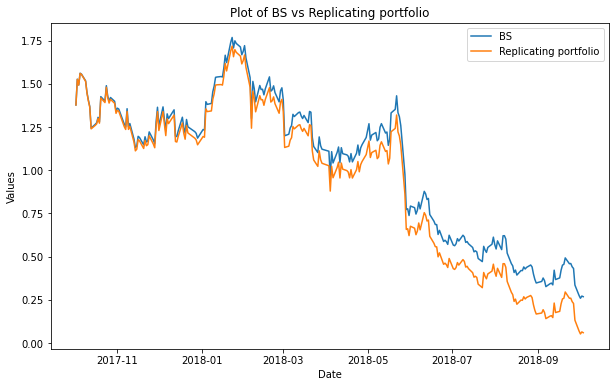

In [312]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].values, data['call_price_BS'].values, label='BS')
plt.plot(data['Date'].values, data['portfolio_values_2'].values, label='Replicating portfolio')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of BS vs Replicating portfolio')
plt.legend()

# Show the plot
plt.show()

0.09143077297368248


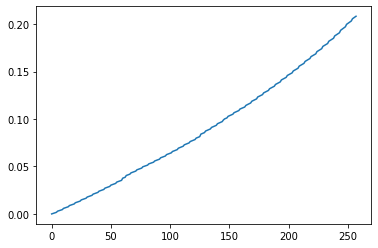

In [313]:
spread_bs_port_2 = data['call_price_BS'].values -data['portfolio_values_2'].values
plt.plot(spread_bs_port_2)
print(spread_bs_port_2.mean())

3/ Représenter le prix d’un call européen en fonction du paramètre de volatilité et calibrer la volatilité 
implicite en utilisant l’algorithme de Newton-Raphson puis l’algorithme de dichotomie.

In [265]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import newton

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def implied_volatility_newton(call_price, S, K, T, r, initial_volatility=0.2, max_iter=100, tol=1e-6):
    def f(sigma):
        return black_scholes_call_price(S, K, T, r, sigma) - call_price

    def f_prime(sigma):
        d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
        return S * np.sqrt(T) * norm.pdf(d1)

    implied_volatility = newton(f, initial_volatility, f_prime, tol=tol, maxiter=max_iter)
    return implied_volatility

def implied_volatility_dichotomy(call_price, S, K, T, r, lower_bound=0.01, upper_bound=1.0, tol=1e-6):
    def f(sigma):
        return black_scholes_call_price(S, K, T, r, sigma) - call_price

    while (upper_bound - lower_bound) / 2 > tol:
        midpoint = (lower_bound + upper_bound) / 2
        if f(lower_bound) * f(midpoint) < 0:
            upper_bound = midpoint
        else:
            lower_bound = midpoint

    implied_volatility = (lower_bound + upper_bound) / 2
    return implied_volatility


In [266]:
# Paramètres
S = 100  # Prix de l'action
K = 100  # Prix d'exercice du call
T = 1    # Temps jusqu'à l'expiration du call (en années)
r = 0.05  # Taux d'intérêt sans risque
call_price_target = 10  # Prix du call que vous souhaitez calibrer

# Calcul de la volatilité implicite avec l'algorithme de Newton-Raphson
volatility_newton = implied_volatility_newton(call_price_target, S, K, T, r)
print(f"Volatilité implicite (Newton-Raphson): {volatility_newton:.4f}")

# Calcul de la volatilité implicite avec l'algorithme de dichotomie
volatility_dichotomy = implied_volatility_dichotomy(call_price_target, S, K, T, r)
print(f"Volatilité implicite (Dichotomie): {volatility_dichotomy:.4f}")

Volatilité implicite (Newton-Raphson): 0.1880
Volatilité implicite (Dichotomie): 0.1880


In [267]:
implied_volatility_newton(data['Prix option strike 6'][4],data['Prix action'][4],6,maturity,0)

0.32669691152964236

In [268]:
implied_volatility_dichotomy(data['Prix option strike 6'][4],data['Prix action'][4],6,maturity,0)

0.3266967868804932

4/ Estimer l’historique de volatilité implicite pour les deux options dont on a l’historique de prix 
(colonnes C et D). 

In [269]:
implied_vol_newton = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_newton.append(implied_volatility_newton(data['Prix option strike 6'][i],data['Prix action'][i],6,maturity,0))
    except:
        implied_vol_newton.append(0)
implied_vol_newton

[0,
 0,
 0.14585982280405935,
 0.14478865705198674,
 0.14431055401663084,
 0.143376249333583,
 0.14296031428120942,
 0.1435088642843417,
 0.14462888400112606,
 0.1465808673587436,
 0.15697992999022548,
 0.16120200979116972,
 0.16320751799998234,
 0.16255799654486044,
 0.16380742903448764,
 0.15918118759920757,
 0.15521756575005116,
 0.15180205363017132,
 0.14971086884163662,
 0.148617769983636,
 0.14727695830039877,
 0.14670529621132355,
 0.14858507527148543,
 0.14878611867465735,
 0.14894062548269768,
 0.15009759540139797,
 0.15504846798966163,
 0.15910062461437377,
 0.15686903007752007,
 0.16096921463615324,
 0.1616618713507513,
 0.17017462823351254,
 0.18083579486343887,
 0.18671694118206753,
 0.18561233816135514,
 0.18485277054525984,
 0.18859372977900796,
 0.18658019627727646,
 0.18775755882264733,
 0.18758270374023356,
 0.18318118085662763,
 0.18384779182926136,
 0.1860099382787087,
 0.17846286122550573,
 0.1692495516733546,
 0.16779717713443168,
 0.16191016530259716,
 0.15984415

In [270]:
implied_vol_newton_5 = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_newton_5.append(implied_volatility_newton(data['Prix option strike 6,5'][i],data['Prix action'][i],6.5,maturity,0))
    except:
        implied_vol_newton_5.append(0)
implied_vol_newton_5

[0,
 0,
 0.11696741446486845,
 0.11656523091931666,
 0.11668746771615673,
 0.11628250373499675,
 0.11575161257975333,
 0.11784389113587214,
 0.12355695337194601,
 0.13248700049914802,
 0.15872073291633765,
 0.17265959433646527,
 0.18075221383114135,
 0.1814521469133252,
 0.18595568942454951,
 0.16867577567068792,
 0.15815108755074114,
 0.14546996513967766,
 0.13898899102849668,
 0.13724678245686917,
 0.1335633878592775,
 0.1328929380870095,
 0.14041918983425378,
 0.14264335419129787,
 0.14471853921787853,
 0.14943402578955556,
 0.162935582067227,
 0.17428475951545175,
 0.16633212787522667,
 0.17671037413130655,
 0.1804652596491309,
 0.19680530139019098,
 0.21499681366855625,
 0.2259208575917405,
 0.22560909485398697,
 0.22591215540902249,
 0.23209230199043904,
 0.22946727592804117,
 0.23177546946437583,
 0.23209389349387527,
 0.2247326992615324,
 0.22604278371264622,
 0.22969614787181986,
 0.2136532764756616,
 0.18963385127688318,
 0.18889103878186206,
 0.1717840156204741,
 0.169337218

In [271]:
implied_vol_dichotomy = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_dichotomy.append(implied_volatility_dichotomy(data['Prix option strike 6'][i],data['Prix action'][i],6,maturity,0))
    except:
        implied_vol_dichotomy.append(0)
implied_vol_dichotomy

[0.9999990558624268,
 0.9999990558624268,
 0.1458604526519775,
 0.14478791236877447,
 0.14431017875671392,
 0.14337548255920413,
 0.14296006202697753,
 0.14350955009460448,
 0.14462929725646972,
 0.14658177375793457,
 0.15698050498962401,
 0.1612026882171631,
 0.16320803642272946,
 0.1625584697723389,
 0.16380661964416499,
 0.15918034553527832,
 0.15521685600280766,
 0.15180285453796388,
 0.14971064567565917,
 0.14861733436584473,
 0.14727665901184084,
 0.14670451164245607,
 0.14858523368835447,
 0.14878539085388182,
 0.14894022941589358,
 0.1500977420806885,
 0.15504879951477052,
 0.15910103797912595,
 0.15686909675598143,
 0.16096854209899902,
 0.16166153907775882,
 0.17017388343811035,
 0.1808350849151611,
 0.18671706199645993,
 0.18561242103576664,
 0.1848533344268799,
 0.1885940074920654,
 0.18658110618591306,
 0.1877575016021728,
 0.1875818920135498,
 0.18318032264709472,
 0.1838468837738037,
 0.1860108470916748,
 0.17846341133117677,
 0.169248628616333,
 0.16779654502868657,
 0.

In [272]:
implied_vol_dichotomy_5 = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_dichotomy_5.append(implied_volatility_dichotomy(data['Prix option strike 6,5'][i],data['Prix action'][i],6.5,maturity,0))
    except:
        implied_vol_dichotomy_5.append(0)
implied_vol_dichotomy_5

[0.9999990558624268,
 0.9999990558624268,
 0.1169679546356201,
 0.11656575202941893,
 0.11668660163879394,
 0.11628251075744629,
 0.11575190544128419,
 0.11784411430358886,
 0.12355614662170414,
 0.13248768806457523,
 0.1587214946746826,
 0.17265885353088378,
 0.18075200080871578,
 0.1814525508880615,
 0.18595608711242673,
 0.16867648124694823,
 0.1581512355804443,
 0.1454695796966553,
 0.13898901939392094,
 0.13724614143371583,
 0.1335640048980713,
 0.13289366722106938,
 0.14041844367980955,
 0.1426428318023682,
 0.1447180461883545,
 0.1494349575042725,
 0.16293612480163572,
 0.1742846584320068,
 0.16633124351501466,
 0.17671109199523927,
 0.18046498298645014,
 0.19680611610412596,
 0.21499587059020997,
 0.22592143058776853,
 0.2256098651885986,
 0.2259119892120361,
 0.23209231376647949,
 0.22946761131286625,
 0.2317750835418701,
 0.23209420204162595,
 0.22473181724548336,
 0.22604228019714356,
 0.22969609260559087,
 0.21365330696105955,
 0.18963444709777832,
 0.18889046669006343,
 0.

In [273]:
data['Vol I6 Newton'] = implied_vol_newton
data['Vol I6 Dichotomy'] = implied_vol_dichotomy
data['Vol I6,5 Newton'] = implied_vol_newton_5
data['Vol I6,5 Dichotomy'] = implied_vol_dichotomy_5

In [274]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,Vol I6 Newton,Vol I6 Dichotomy,"Vol I6,5 Newton","Vol I6,5 Dichotomy"
0,2017-10-02,6.7420,NaN,NaN,0.690389,1.374368,0.137770,1.374368,0.717437,0.608477,0.255134,0.539992,0.361817,1.374368,0.000000,0.999999,0.000000,0.999999
1,2017-10-03,6.9550,NaN,NaN,0.718743,1.523491,0.127917,1.521421,0.852063,0.660876,0.235955,0.542124,0.360466,1.524132,0.000000,0.999999,0.000000,0.999999
2,2017-10-04,6.9100,1.02096,0.59093,0.713008,1.490294,0.130142,1.489077,0.821935,0.650227,0.240523,0.541080,0.361183,1.491578,0.145860,0.145860,0.116967,0.116968
3,2017-10-05,7.0060,1.09932,0.65885,0.725368,1.558358,0.125794,1.557526,0.884829,0.672962,0.231411,0.543597,0.359549,1.560282,0.144789,0.144788,0.116565,0.116566
4,2017-10-06,7.0000,1.09306,0.65440,0.724694,1.553030,0.126194,1.553174,0.880172,0.671660,0.232239,0.543380,0.359727,1.555593,0.144311,0.144310,0.116687,0.116687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2018-09-28,5.8440,0.28498,0.19737,0.473526,0.333857,0.394771,0.617081,0.047469,0.159275,0.408992,0.965230,0.319789,0.649752,0.298548,0.298548,0.362253,0.362253
254,2018-10-01,5.7240,0.24261,0.16974,0.423673,0.273660,0.403005,0.560258,0.029332,0.110635,0.330316,1.220058,0.288691,0.593872,0.312172,0.312172,0.376124,0.376124
255,2018-10-02,5.6900,0.24491,0.17452,0.409124,0.257419,0.404461,0.545853,0.025212,0.098443,0.307024,1.317359,0.279439,0.579029,0.328587,0.328587,0.393196,0.393196
256,2018-10-03,5.7260,0.27191,0.19592,0.422907,0.270301,0.407211,0.560581,0.028367,0.108528,0.329310,1.236557,0.288706,0.593245,0.341453,0.341454,0.406829,0.406830


<AxesSubplot:>

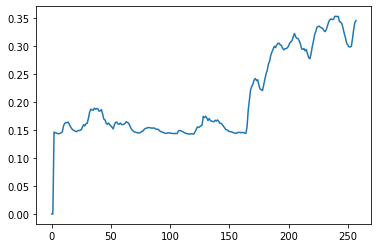

In [275]:
data['Vol I6 Newton'].plot()

<AxesSubplot:>

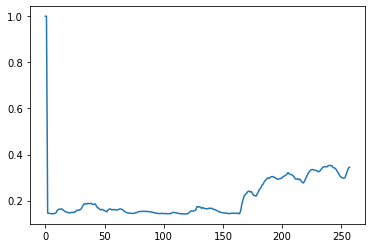

In [276]:
data['Vol I6 Dichotomy'].plot()

5/ Déterminer rétrospectivement la meilleure couverture dynamique pour la première option (strike 
de 6, colonne C), puis proposer un portefeuille de réplication pour la dernière date (pour vous couvrir 
jusqu’au lendemain). Vous déposerez votre réponse ici : https://goo.gl/forms/9bobGfSpaU9aRDWF3 
(cela contribuera à une partie de la note finale de ce cours, l’absence de réponse fera donc baisser 
cette note). Lors de la prochaine séance, le P&L obtenu par votre stratégie de réplication vous sera 
dévoilé. 

In [277]:
num_simulations = 1000

mean_return = data['Prix action'].pct_change().mean()
std_return = data['Prix action'].pct_change().std()
last_price = data['Prix action'][len(data)-1]
num_days = 1

# Perform Monte Carlo simulation
simulations = np.zeros((num_simulations, num_days))

for i in range(num_simulations):
    # Generate random daily returns based on historical mean and standard deviation
    daily_returns = np.random.normal(mean_return, std_return, num_days)
    
    # Calculate the simulated price at T+1
    simulations[i, :] = last_price * (1 + daily_returns)

In [278]:
daily_returns

array([0.00521504])

In [279]:
def replication_portfolio(S, K, T, r, implied_volatility, option_type='call'):
    d1 = (np.log(S / K) + (r + (implied_volatility ** 2) / 2) * T) / (implied_volatility * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    else:
        pass

    amount_in_risk_free = delta * S

    amount_in_stock = delta * S - black_scholes_call(S, K, T, r, implied_volatility)

    return delta, amount_in_risk_free, amount_in_stock



In [280]:
delta_tab = []
amount_in_risk_free = []
amount_in_stock = []


for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        a, b, c = replication_portfolio(data['Prix action'][i], 6, maturity, 0, data['Vol I6 Newton'][i])
        delta_tab.append(a)
        amount_in_risk_free.append(b)
        amount_in_stock.append(c)
    except:
        delta_tab.append(0)
        amount_in_risk_free.append(0)
        amount_in_stock.append(0)



C:\Users\theom\AppData\Local\Temp\ipykernel_22856\3590799676.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + (implied_volatility ** 2) / 2) * T) / (implied_volatility * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_22856\2593681655.py:2: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate daily returns
data['Daily_Return'] = data['Prix action'].pct_change()

# Calculate mean and standard deviation of daily returns
mean_return = data['Daily_Return'].mean()
std_return = data['Daily_Return'].std()

# Get the last closing price in the dataset
last_price = data['Prix action'].iloc[-1]

# Number of simulations
num_simulations = 1000

# Number of trading days to simulate into the future
num_days = 1

# Perform Monte Carlo simulation
simulations = np.zeros((num_simulations, num_days))

for i in range(num_simulations):
    # Generate random daily returns based on historical mean and standard deviation
    daily_returns = np.random.normal(mean_return, std_return, num_days)
    
    # Calculate the simulated price at T+1
    simulations[i, :] = last_price * (1 + daily_returns)

prix_T1 = simulations.mean()
prix_T1

5.718844132731178

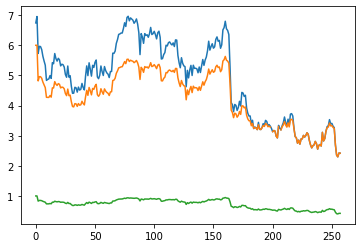

In [282]:
plt.plot(amount_in_risk_free)
plt.plot(amount_in_stock)
plt.plot(delta_tab)

plt.show()

<AxesSubplot:>

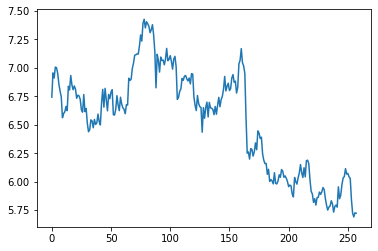

In [283]:
data['Prix action'].plot()

In [284]:
import numpy as np
import matplotlib.pyplot as plt

delta = datetime(2018, 12, 31) - data['Date'].iloc[-1]
maturity = delta.days
maturity /= 365


# Option 1
strike_1 = 6
call_price_1 = black_scholes_call_price(data['Prix action'].iloc[-1],6,maturity,0,data['Vol I6 Dichotomy'].iloc[-1])
delta_1 = calculate_delta(data['Prix action'].iloc[-1],6,maturity,0,data['Vol I6 Dichotomy'].iloc[-1])  # Replace with the actual delta for your option
gamma_1 = calculate_gamma(data['Prix action'].iloc[-1],6,maturity,0,data['Vol I6 Dichotomy'].iloc[-1])  # Replace with the actual gamma for your option

# Option 2
strike_2 = 6.5
call_price_2 = black_scholes_call_price(data['Prix action'].iloc[-1],6.5,maturity,0,data['Vol I6,5 Dichotomy'].iloc[-1])
delta_2 = calculate_delta(data['Prix action'].iloc[-1],6.5,maturity,0,data['Vol I6,5 Dichotomy'].iloc[-1])  # Replace with the actual delta for your option
gamma_2 = calculate_gamma(data['Prix action'].iloc[-1],6.5,maturity,0,data['Vol I6,5 Dichotomy'].iloc[-1])  # Replace with the actual gamma for your option

# Stock
stock_price = data['Prix action'].iloc[-1]
stock_delta = 1  # Delta for the stock is always 1
stock_gamma = 0  # Gamma for the stock is always 0

# Portfolio weights
weight_stock = 1  # Number of shares
weight_option_1 = -delta_1 * weight_stock
weight_option_2 = -delta_2 * weight_stock

# Simulate a range of stock prices
stock_prices = data['Prix action']


stock_prices = np.linspace(data['Prix action'].min(), data['Prix action'].max(), len(data))

C:\Users\theom\AppData\Local\Temp\ipykernel_22856\2593681655.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_22856\2593681655.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_22856\2593681655.py:19: RuntimeWarning: invalid value encountered in scalar divide
  gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))


In [314]:
derniere_ligne = data.iloc[-1]
derniere_ligne

Date                      2018-10-04 00:00:00
Prix action                            5.7223
Prix option strike 6                  0.27191
Prix option strike 6,5                0.19592
delta_call                           0.421195
call_price_BS                        0.268202
gamma_call                           0.407707
portfolio_values                     0.563638
call_price_BS_2                      0.192545
delta_call_2                         0.295249
gamma_call_2                         0.301991
nc                                   1.350061
ns                                   0.022591
portfolio_values_2                   0.059779
Vol I6 Newton                         0.34481
Vol I6 Dichotomy                     0.344811
Vol I6,5 Newton                      0.410265
Vol I6,5 Dichotomy                   0.410264
Daily_Return                        -0.000646
Name: 257, dtype: object

In [292]:
# Initialisation
nombre_options = 1
actions_detenues = 0  
delta = datetime(2018, 12, 31) - data['Date'].iloc[-1]
maturity = delta.days
maturity /= 365

def calculate_delta_2(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta


In [293]:
for i in range(len(data)):
    d = calculate_delta_2(data['Prix action'][i], 6, maturity, 0, data['Vol I6 Newton'][i])
    actions_a_acheter = d * nombre_options - actions_detenues
    actions_detenues += actions_a_acheter

derniere_action_a_acheter = actions_detenues

print(f"Nombre d'actions à acheter pour la dernière date : {derniere_action_a_acheter}")


Nombre d'actions à acheter pour la dernière date : 0.4226009772702461


C:\Users\theom\AppData\Local\Temp\ipykernel_22856\457730776.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


In [294]:
prix_option_pred_6 = black_scholes_call_price(derniere_ligne['Prix action'],6,maturity,0,derniere_ligne['Vol I6,5 Newton'])
prix_option_pred_6_5 = black_scholes_call_price(derniere_ligne['Prix action'],6.5,maturity,0,derniere_ligne['Vol I6,5 Newton'])


# Calculer le delta pour la dernière date pour chaque option
delta_option_strike_6 = calculate_delta_2(derniere_ligne['Prix action'], 6 , maturity, 0, derniere_ligne['Vol I6,5 Newton'])
delta_option_strike_6_5 = calculate_delta_2(derniere_ligne['Prix action'], 6.5, maturity, 0, derniere_ligne['Vol I6,5 Newton'])

# Déterminer le nombre d'actions à détenir
nombre_actions_pour_option_6 = delta_option_strike_6 * 1

# Déterminer le nombre d'options de strike 6,5 à détenir
# Vous pouvez ajuster cette formule en fonction de votre stratégie de couverture spécifique
nombre_options_pour_strike_6_5 = -delta_option_strike_6 * 1 / delta_option_strike_6_5

print(f"Nombre d'actions à acheter pour le dernier jour : {nombre_actions_pour_option_6}")
print(f"Nombre d'options de strike 6,5 à détenir : {nombre_options_pour_strike_6_5}")


Nombre d'actions à acheter pour le dernier jour : 0.44649615057621295
Nombre d'options de strike 6,5 à détenir : -1.5012722381021142
